In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv("machine_learning_models/datasets/new_unicorn_data_updated.csv")

In [3]:
df.head()

,Company,Date Joined,Industry,Country,City,Continent,Year Founded,Funding,Funding_Numeric ($B),Valuation (March) ($B),Select Investors (March),Valuation (November) ($B),Select Investors (November),Years to Unicorn,Most Recent Valuation
0,SpaceX,2012-12-01,Other,United States,Hawthorne,North America,2002,$7B,7.000,100,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,127.0
1,SHEIN,2018-07-03,E-commerce And Direct-to-consumer,China,Shenzhen,Asia,2008,$2B,2.000,100,"Tiger Global Management, Sequoia Capital China...",100.0,"Tiger Global Management, Sequoia Capital China...",10,100.0
2,Stripe,2014-01-23,Fintech,United States,San Francisco,North America,2010,$2B,2.000,95,"Khosla Ventures, LowercaseCapital, capitalG",95.0,"Khosla Ventures, LowercaseCapital, capitalG",4,95.0
3,Klarna,2011-12-12,Fintech,Sweden,Stockholm,Europe,2005,$4B,4.000,46,"Institutional Venture Partners, Sequoia Capita...",6.7,"Institutional Venture Partners, Sequoia Capita...",6,6.7
4,Canva,2018-01-08,Internet Software And Services,Australia,Surry Hills,Oceania,2012,$572M,0.572,40,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0,"Sequoia Capital China, Blackbird Ventures, Mat...",6,40.0


In [4]:
# Fix negative values

df['Years to Unicorn'] = df['Years to Unicorn'].replace(-3, 1)

df['Years to Unicorn'] = df['Years to Unicorn'].replace(0, 1)


In [5]:
# Encode 'Industry'
industry_le = LabelEncoder()
df['Industry_Data'] = industry_le.fit_transform(df['Industry'])

# Encode 'Country'
country_le = LabelEncoder()
df['Country_Data'] = country_le.fit_transform(df['Country'])

# Print the mapping dictionaries for 'Industry' and 'Country'
industry_mapping_dict = dict(zip(df['Industry_Data'].unique(), industry_le.inverse_transform(df['Industry_Data'].unique())))
sorted_industry_mapping_dict = sorted(industry_mapping_dict.items(), key=lambda x: x[0])

country_mapping_dict = dict(zip(df['Country_Data'].unique(), country_le.inverse_transform(df['Country_Data'].unique())))
sorted_country_mapping_dict = sorted(country_mapping_dict.items(), key=lambda x: x[0])

print("Industry_Data Mapping:")
for key, value in sorted_industry_mapping_dict:
    print(f"{key} = {value}")

print("\nCountry_Data Mapping:")
for key, value in sorted_country_mapping_dict:
    print(f"{key} = {value}")

Industry_Data Mapping:
0 = Artificial Intelligence
1 = Auto And Transportation
2 = Consumer And Retail
3 = Cybersecurity
4 = Data Management And Analytics
5 = E-commerce And Direct-to-consumer
6 = Edtech
7 = Fintech
8 = Hardware
9 = Health
10 = Internet Software And Services
11 = Mobile And Telecommunications
12 = Other
13 = Supply Chain, Logistics, And Delivery
14 = Travel

Country_Data Mapping:
0 = Argentina
1 = Australia
2 = Austria
3 = Bahamas
4 = Belgium
5 = Bermuda
6 = Brazil
7 = Canada
8 = Chile
9 = China
10 = Colombia
11 = Croatia
12 = Denmark
13 = Estonia
14 = Finland
15 = France
16 = Germany
17 = Hong Kong
18 = India
19 = Indonesia
20 = Ireland
21 = Israel
22 = Italy
23 = Japan
24 = Lithuania
25 = Luxembourg
26 = Malaysia
27 = Mexico
28 = Netherlands
29 = Nigeria
30 = Norway
31 = Philippines
32 = Senegal
33 = Singapore
34 = South Africa
35 = South Korea
36 = Spain
37 = Sweden
38 = Switzerland
39 = Thailand
40 = Turkey
41 = United Arab Emirates
42 = United Kingdom
43 = United 

In [6]:
# CompanyAge
df["CompanyAge"] = 2023 - df["Year Founded"]

In [7]:
df["CompanyAge"]

0       21
1       15
2       13
3       18
4       11
        ..
1034    11
1035     8
1036     5
1037    18
1038     9
Name: CompanyAge, Length: 1039, dtype: int64

In [8]:
# Select features
features = ['Industry_Data', 'Country_Data', 'CompanyAge', 'Funding_Numeric ($B)']

In [9]:
# The youngest Year now - Year Found

In [10]:
X = df[features]
X

,Industry_Data,Country_Data,CompanyAge,Funding_Numeric ($B)
0,12,43,21,7.000
1,5,9,15,2.000
2,7,43,13,2.000
3,7,37,18,4.000
4,10,1,11,0.572
...,...,...,...,...
1034,5,9,11,0.379
1035,5,9,8,0.990
1036,2,9,5,0.080
1037,7,42,18,0.792


In [11]:
Y = df['Years to Unicorn']
Y

0       10
1       10
2        4
3        6
4        6
        ..
1034     5
1035     2
1036     3
1037    16
1038     6
Name: Years to Unicorn, Length: 1039, dtype: int64

In [12]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
# Create and train the SVM model for regression
start_time = time.time()  # Record the start time
svm_regressor = SVR(kernel='linear')  # You can try different kernels: 'linear', 'poly', 'rbf', etc.
svm_regressor.fit(X_train, Y_train)
end_time = time.time()  # Record the end time

In [14]:
# Make predictions
Y_pred_svm = svm_regressor.predict(X_test)

In [15]:
# Calculate the training time
training_time = end_time - start_time
print(f'Training Time: {training_time} seconds')

Training Time: 0.29790282249450684 seconds


In [16]:
# Evaluate the model
mse_svm = mean_squared_error(Y_test, Y_pred_svm)
print(f'Mean Squared Error (SVM): {mse_svm}')

Mean Squared Error (SVM): 3.744757432396308


In [17]:
# Root Mean Squared Error
rmse = mean_squared_error(Y_test, Y_pred_svm)
print(f'Root Mean Squared Error: {np.sqrt(rmse)}')

Root Mean Squared Error: 1.9351375745399364


In [18]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred_svm)

0.7939382252209338

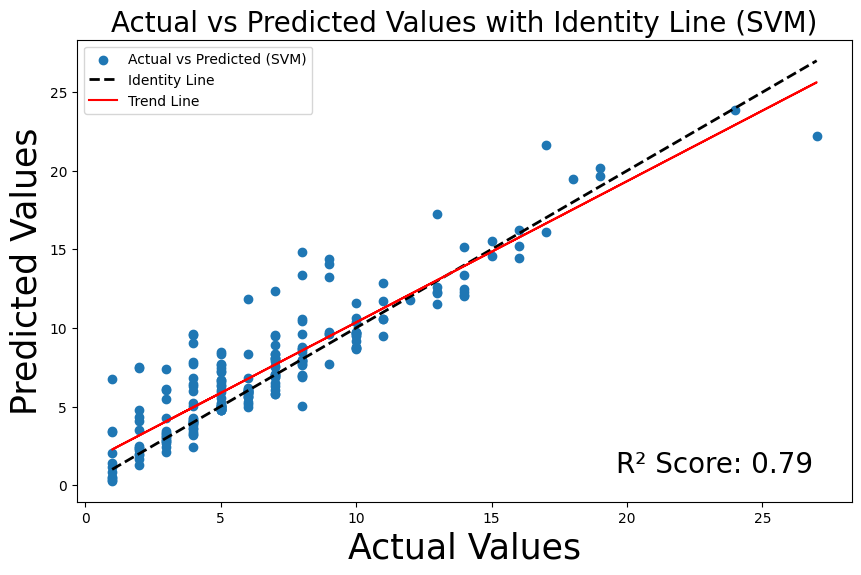

In [19]:
r2_score_result = r2_score(Y_test, Y_pred_svm)

# Plot the actual vs predicted values with the identity line
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_svm, label='Actual vs Predicted (SVM)')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Identity Line')
plt.title('Actual vs Predicted Values with Identity Line (SVM)', fontsize=20)
plt.xlabel('Actual Values', fontsize=25)
plt.ylabel('Predicted Values', fontsize=25)

# Add a trend line (line of best fit)
z = np.polyfit(Y_test, Y_pred_svm, 1)
p = np.poly1d(z)
plt.plot(Y_test, p(Y_test), color='red', label='Trend Line')


# Add R² score as text on the plot at the bottom right
plt.text(0.95, 0.05, f'R² Score: {r2_score_result:.2f}', 
         transform=plt.gca().transAxes, fontsize=20, 
         verticalalignment='bottom', horizontalalignment='right')

plt.legend()
plt.show()

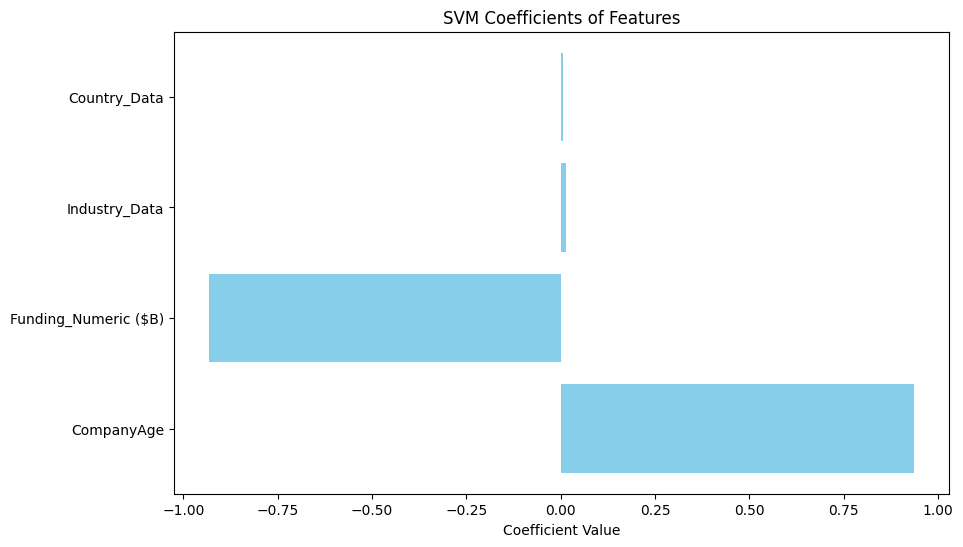

In [20]:
# Extract coefficients and intercept
coefficients = svm_regressor.coef_
intercept = svm_regressor.intercept_

# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients.flatten()})

# Sorting the DataFrame by absolute coefficient values for better visualization
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('SVM Coefficients of Features')
plt.show()


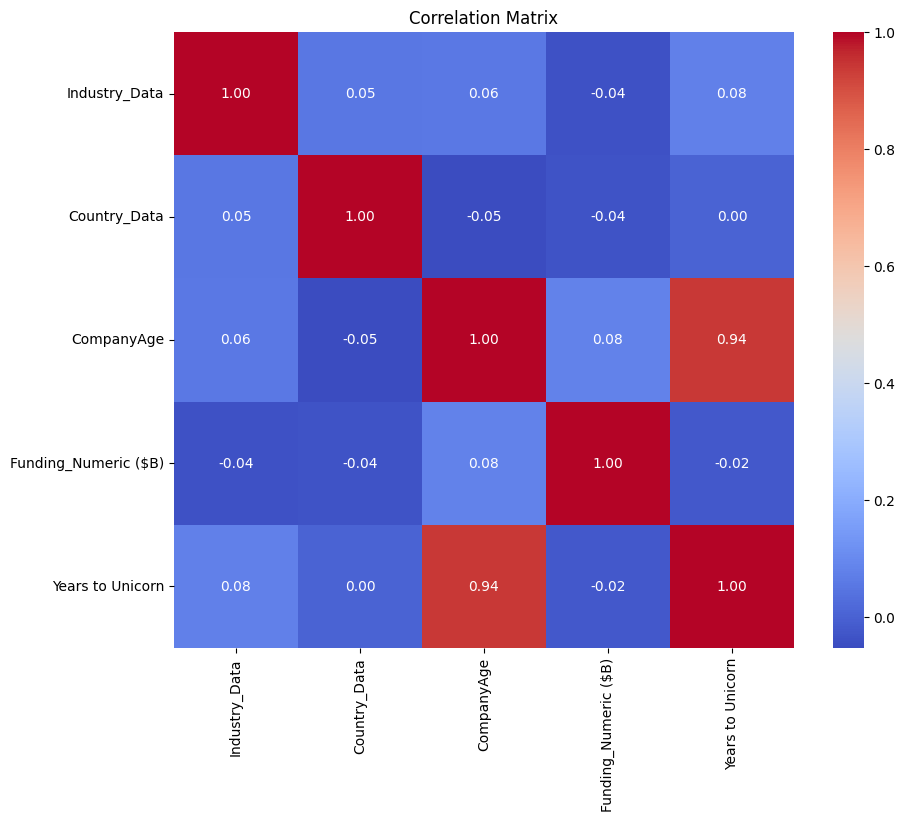

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it already contains the necessary columns
features = ['Industry_Data', 'Country_Data', 'CompanyAge', 'Funding_Numeric ($B)', 'Years to Unicorn']
correlation_matrix = df[features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [22]:
Y.unique()

array([10,  4,  6,  7,  2,  3, 27,  9, 11,  5,  1, 18,  8, 17, 12, 14, 25,
       22, 16, 15, 19, 26, 13, 98, 20, 21, 24, 37, 28])